In [1]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

import numpy as np

# Scipy

Scipy is a library with many numerical algorithm

* Special functions
* Integrals
* Differential equations
* optimisation
* linear algebra

## Special functions

Fonctions not in numpy : Bessel, Airy, error function... 

In [2]:
from scipy.special import erf, jn

In [3]:
erf(0.1)

0.1124629160182849

## Numerical integration

Many algorithm. The simplest : ``quad``

Example : error function
    $$ \mathrm{erf}(x) = \int_0^x \frac{2}{\sqrt{\pi}} e^{-t^2} dt$$
    
Remarks : 

* Integration to infinity (``np.inf``)
* If you have the function, do not use an array. Quad is smarter than you.
* If you have points, use ``trapz`` or ``simps``

In [12]:
def ma_fonction(t):
#    print('Hello')
    return 2/np.sqrt(np.pi)*np.exp(-t**2)

In [13]:
from scipy.integrate import quad

quad(ma_fonction, 0, 1)[0] - erf(1)

1.1102230246251565e-16

In [14]:
quad(ma_fonction, 0, np.inf)

(1.0, 8.01297993644236e-09)

11.5

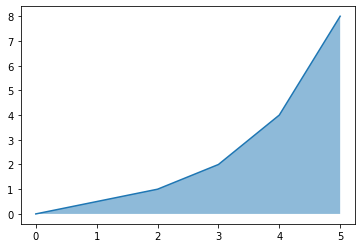

In [15]:
from scipy.integrate import trapz

data_y = [0, 1, 2, 4, 8]
data_x = [0, 2, 3, 4, 5]

plt.plot(data_x, data_y)
plt.fill_between(data_x, data_y, alpha=.5)


trapz(data_y, data_x)

## Ordinary differential equations

## Equations différentielles

The package ``scipy.integrate`` contains functions to solve ODE : 

$$\frac{dy}{dt} = f(t, y)$$
    
with given initial conditions ($y$ is known at time $t_0$). Note that $y$ can be a vector (``np.array``).

We use ``solve_ivp`` (replace ``ode`` or ``odeint``): 

    def solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, ...)
    
On can choos the integration metdhod (by default Runge-Kutta order 5(4) with adaptative steps)

The function ``solve_ivp`` returns an object (a dictionnary) with the result (res.y) and information about the convergence of the algorithm.

Example : 
$$\frac{dy}{dt} = -y$$    


### Higher order differential equation

Increase the dimension of $y$ by adding derivative. 

For example : 

$$\frac{d^2y}{dt^2} = \frac{f(y)}{m}$$

became :

$$\frac d{dt} \begin{pmatrix}
y \\ 
y ^\prime
\end{pmatrix} = \begin{pmatrix}
y ^\prime \\
f(y)/m
\end{pmatrix} = F(y, y^\prime)$$



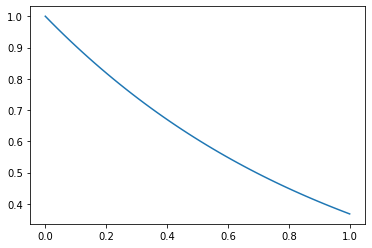

In [21]:
from scipy.integrate import solve_ivp

def f(t, y):
    return -y

res = solve_ivp(f, [0, 1], [1], t_eval=np.linspace(0, 1))

fig = figure()
ax = fig.subplots(1, 1)

ax.plot(res.t, res.y[0])

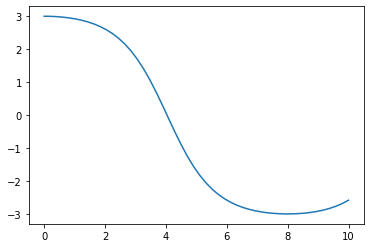

In [30]:
def f(t, y):
    theta, theta_dot = y
    return [theta_dot, -np.sin(theta)]

y0 = [3, 0]

res = solve_ivp(f, [0, 10], y0, t_eval=np.linspace(0, 10))
fig = figure()
ax = fig.subplots(1, 1)

ax.plot(res.t, res.y[0])

In [26]:
res.y

array([[ 1.        ,  0.99562122,  0.9825195 ,  0.96077723,  0.93049582,
         0.8918496 ,  0.84508828,  0.79053692,  0.72859596,  0.65974119,
         0.58451819,  0.5035408 ,  0.41756076,  0.32738878,  0.23388248,
         0.1379464 ,  0.04053198, -0.0573624 , -0.15469146, -0.25036302,
        -0.34339494, -0.43294291, -0.51812837, -0.59815548, -0.67231122,
        -0.73996535, -0.80057043, -0.85366182, -0.89885769, -0.93587547,
        -0.9645715 , -0.98474152, -0.99622534, -0.99892821, -0.99282075,
        -0.97793899, -0.95438436, -0.92232369, -0.88198919, -0.83367578,
        -0.77769022, -0.71441384, -0.64432247, -0.56797515, -0.48601416,
        -0.39916501, -0.30823647, -0.21412052, -0.11779237, -0.0203086 ],
       [ 0.        , -0.08578374, -0.17108424, -0.25540705, -0.33820609,
        -0.41888676, -0.49680653, -0.57127495, -0.64155369, -0.70685645,
        -0.76638427, -0.81942548, -0.86500322, -0.90225739, -0.93050967,
        -0.94926344, -0.95820386, -0.9571978 , -0.

## Optimisation

* Zeros of a function
* Minimum
* least square / fit


Example : 
* first positive solution of $\tan(x)=x$
* First minimum of $sinc(x)$

In [31]:
from scipy.optimize import root_scalar, minimize_scalar

(4.0, 5.0)

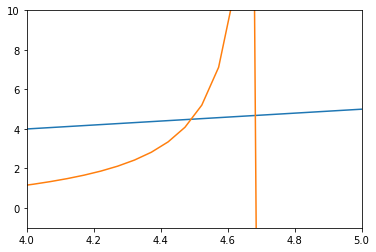

In [36]:
x = np.linspace(0, 10, 200)

fig = figure()
ax = fig.subplots(1, 1)

ax.plot(x, x)
ax.plot(x, np.tan(x))
ax.set_ylim(-1, 10)
ax.set_xlim(4, 5)

In [39]:
res = root_scalar(lambda x: np.tan(x) - x, x0=4, x1=4.6)
res.root

4.493409457909069

In [40]:
np.tan(res.root)

4.493409457909159

 message: Solution found.
 success: True
  status: 0
     fun: -0.2172336282112185
       x: 1.430296598813049
     nit: 9
    nfev: 9

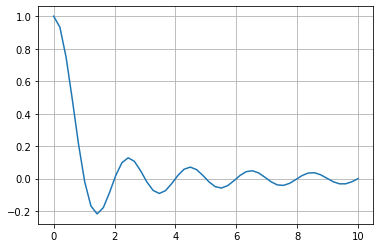

In [46]:
x = np.linspace(0, 10)

fig = figure()
ax =fig.subplots(1, 1)

ax.plot(x, np.sinc(x))
ax.grid()

minimize_scalar(np.sinc, bounds = [1, 2])

In [45]:
minimize_scalar?

### Fit

$$ y(x) = a e^{(x-x_0)^2/w^2}$$

<ErrorbarContainer object of 3 artists>

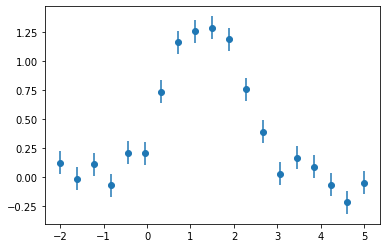

In [47]:
from scipy.optimize import curve_fit

x = np.linspace(-2, 5, 19)
y = 1.45*np.exp(-(x-1.34)**2/1.34)
yn = y + 0.1*np.random.normal(size=len(x))

plt.errorbar(x, yn, yerr=.1, fmt='o')

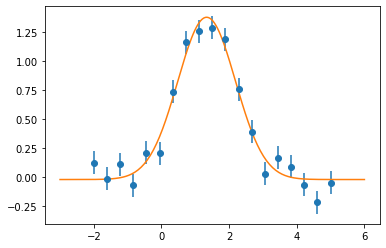

In [59]:
def fit_function(x, center, width, amplitude, offset):
    return offset + amplitude*np.exp(-(x-center)**2/(2*width**2)  )

x_plot = np.linspace(-3, 6, 200)

plt.errorbar(x, yn, yerr=.1, fmt='o')
p0 = [1, 1, 1.5, 0]
#plt.plot(x_plot, fit_function(x_plot, *p0))

p_opt, p_cov = curve_fit(fit_function, x, yn, p0)

plt.plot(x_plot, fit_function(x_plot, *p_opt))


In [57]:
np.sqrt(p_cov[0, 0])

0.048577439279207775

### FIt of a picture

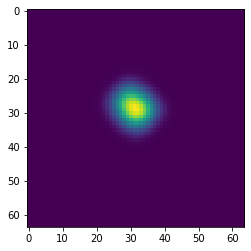

In [5]:
from matplotlib.pyplot import imread

data = imread('data/exemple_gaussienne.png')

fig = plt.figure()
ax = fig.subplots(1, 1)

ax.imshow(data)

In [18]:
ny, nx = data.shape
X,Y = np.meshgrid(range(nx), range(ny))

XY = np.array([X.flatten(), Y.flatten()]).transpose()

def gauss(XY, amplitude, center_x, center_y, diameter):
    x = XY[:,0]
    y = XY[:,1]
    return amplitude*np.exp(-((x-center_x)**2 + (y-center_y)**2)/diameter**2)

p0 = [1, 30, 30, 3]

popt, pcov = curve_fit(gauss, XY, data.flatten(), p0)
popt

array([ 0.83096663, 31.05667531, 28.43598741,  5.46078621])

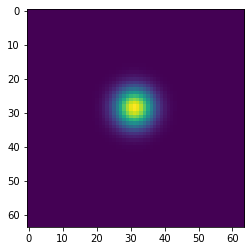

In [17]:
fig = plt.figure()
ax = fig.subplots(1, 1)

data_fit = gauss(XY, *popt)

data_fit = data_fit.reshape((ny, nx))

ax.imshow(data_fit)